## Source: Google TensorFlow tutorial

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pylab as plt

import pandas as pd

print(tf.__version__
     )

1.12.0


## Prepare data

In [2]:
# Import Data from the Fasion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
train_images,test_images=train_images/255,test_images/255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

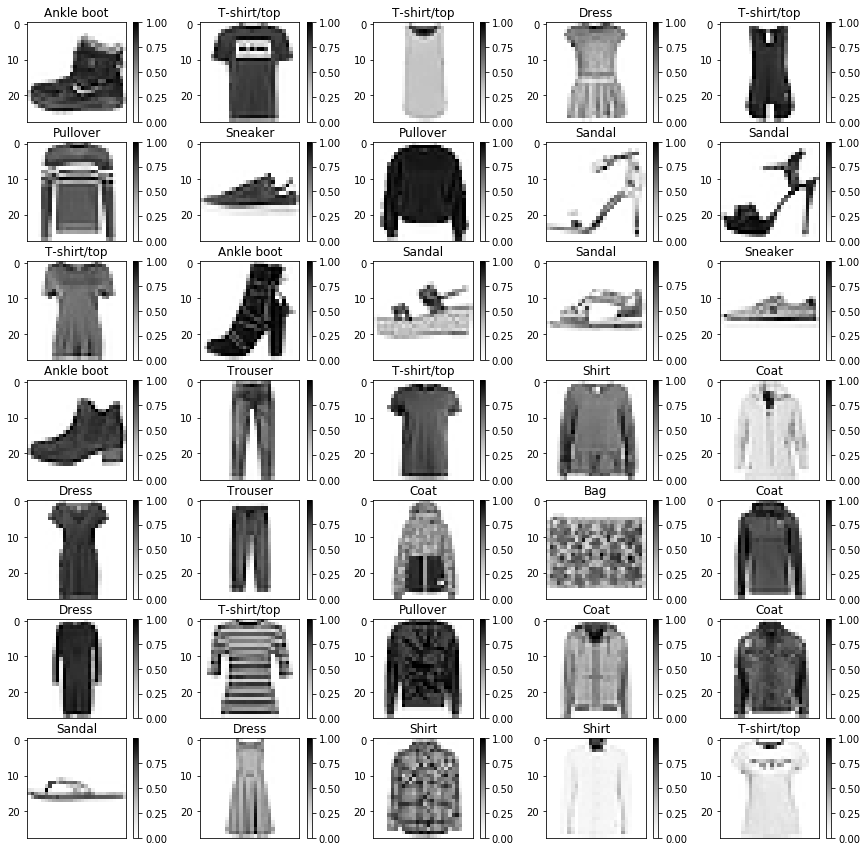

In [4]:
# Display the model
n_row,n_col = 7,5
fig = plt.figure(figsize=[15,15])
for i in range(n_row*n_col):
    plt.subplot(n_row,n_col,i+1,title=class_names[train_labels[i]])
    plt.imshow(train_images[i],cmap='Greys')
    plt.xticks([])
    plt.colorbar()

## Build the model

In [5]:
model = keras.Sequential()

In [6]:
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Train the model

In [29]:
select_train_images,select_train_labels = train_images[:10000,:,:],train_labels[:10000]

In [30]:
his = model.fit(select_train_images,select_train_labels,epochs=10)

Epoch 1/10
10000/10000 [==============================] - 1s 109us/step - loss: 0.5746 - acc: 0.8110
Epoch 2/10
10000/10000 [==============================] - 1s 107us/step - loss: 0.4279 - acc: 0.8474
Epoch 3/10
10000/10000 [==============================] - 1s 130us/step - loss: 0.3804 - acc: 0.8626
Epoch 4/10
10000/10000 [==============================] - 1s 116us/step - loss: 0.3513 - acc: 0.8714
Epoch 5/10
10000/10000 [==============================] - 1s 114us/step - loss: 0.3308 - acc: 0.8785
Epoch 6/10
10000/10000 [==============================] - 1s 117us/step - loss: 0.3066 - acc: 0.8883
Epoch 7/10
10000/10000 [==============================] - 1s 118us/step - loss: 0.2928 - acc: 0.8928
Epoch 8/10
10000/10000 [==============================] - 1s 128us/step - loss: 0.2768 - acc: 0.8990
Epoch 9/10
10000/10000 [==============================] - 1s 125us/step - loss: 0.2649 - acc: 0.9066
Epoch 10/10
10000/10000 [==============================] - 1s 124us/step - loss: 0.2557 - a

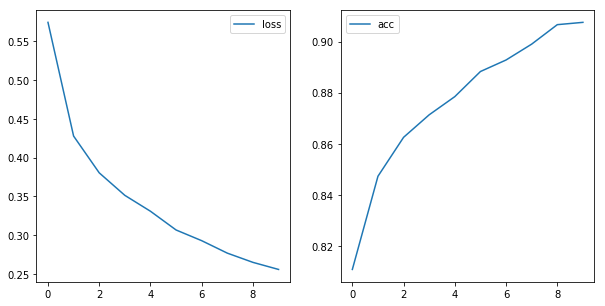

In [31]:
train_sum = {key:np.array(value) for key,value in his.history.items()}

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(np.arange(10),train_sum['loss'],label='loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(10),train_sum['acc'],label='acc')
plt.legend()

## Evaluate the model

In [32]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 49us/step


## Make predictions

In [35]:
predictions = model.predict(test_images)

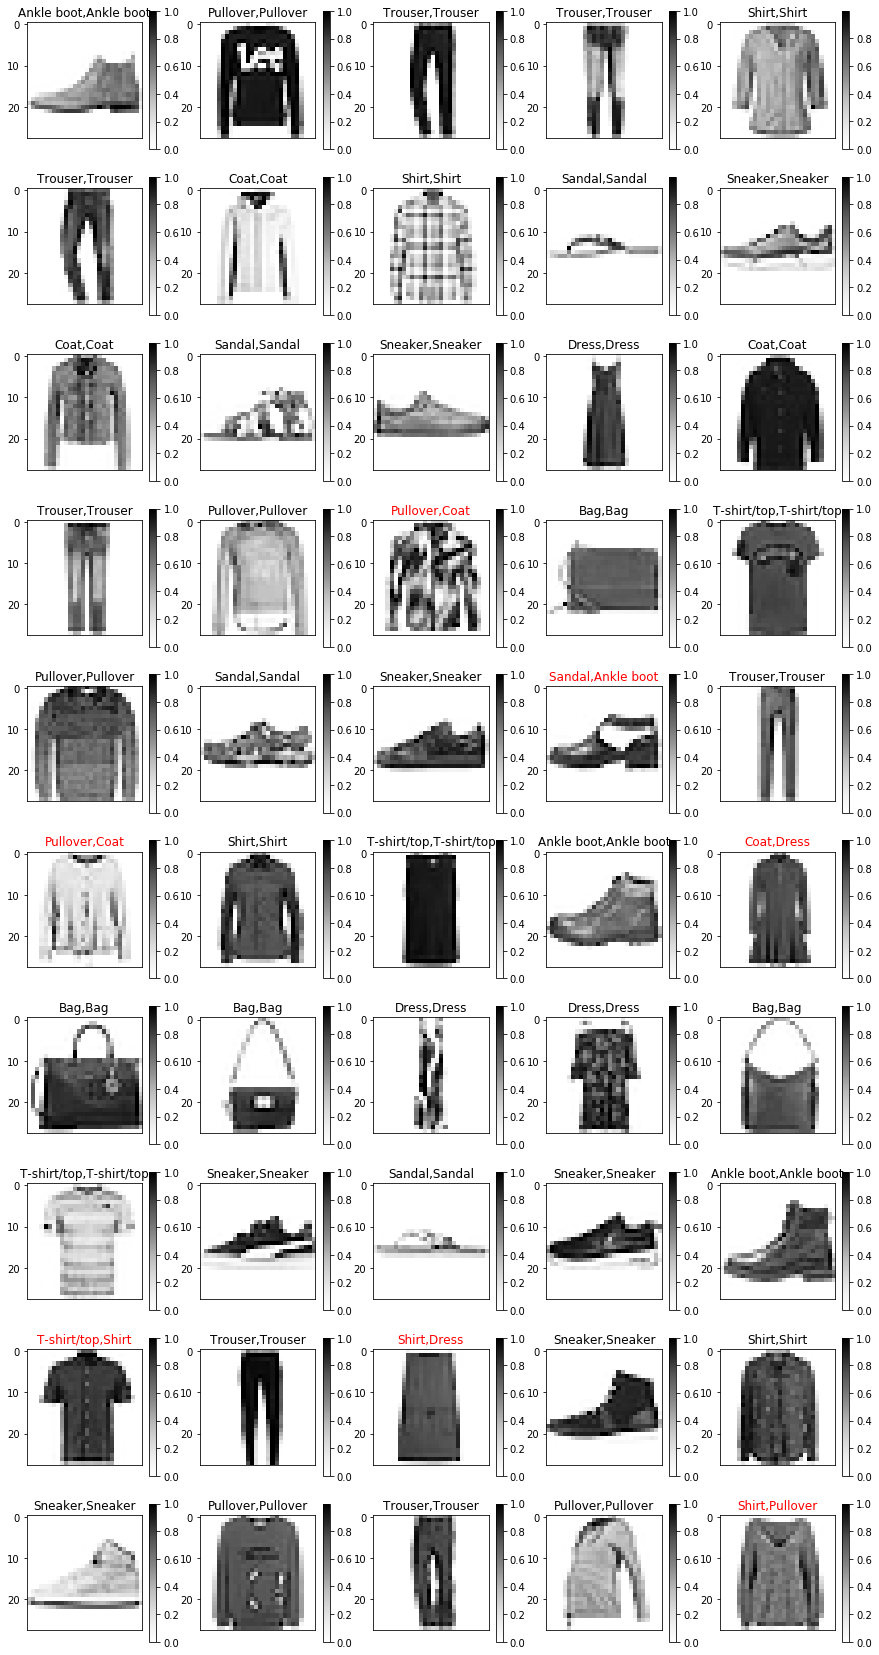

In [36]:
n_row, n_col = 10,5
fig = plt.figure(figsize=[n_col*3,n_row*3])
for i in range(n_row*n_col):
    predict_label = class_names[np.argmax(predictions[i])]
    plt.subplot(n_row,n_col,i+1)
    plt.imshow(test_images[i],cmap='Greys')
    plt.colorbar()
    title_color = 'k'
    if predict_label!=class_names[test_labels[i]]:
        title_color = 'r'
    plt.title(predict_label+','+class_names[test_labels[i]],color=title_color)
    plt.xticks([])

In [37]:
n_correct = 0
for i in range(len(test_labels)):
    if np.argmax(predictions[i])==test_labels[i]:
        n_correct+=1
len(test_labels)-n_correct

1410